<a href="https://colab.research.google.com/github/EvstratovEA/coupon_recommendation/blob/main/coupon_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### **Attribute Information:**

**destination**: No Urgent Place, Home, Work  
**passanger**: Alone, Friend(s), Kid(s), Partner (*who are the passengers in the car*)  
**weather**: Sunny, Rainy, Snowy  
**temperature**: 55, 80, 30  
**time**: 2PM, 10AM, 6PM, 7AM, 10PM  
**coupon**: Restaurant(<\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\$20-\$50)  
**expiration**: 1d, 2h (*the coupon expires in 1 day or in 2 hours*)  
**gender**: Female, Male  
**age**: 21, 46, 26, 31, 41, 50plus, 36, below21  
**maritalStatus**: Unmarried partner, Single, Married partner, Divorced, Widowed  
**has_Children**: 1, 0  
**education**: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree Masters or Doctorate), Some High School  
**occupation**: Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, 
Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry  
**income**: \$37500 - \$49999, \$62500 - \$74999, \$12500 - \$24999, \$75000 - \$87499, \$50000 - \$62499, \$25000 - \$37499, \$100000 or More, \$87500 - \$99999, Less than \$12500  
**Bar**: never, less1, 1\~3, gt8, nan, 4\~8 (*feature meaning: how many times do you go to a bar every month?*)  
**CoffeeHouse**: never, less1, 4\~8, 1\~3, gt8, nan (*feature meaning: how many times do you go to a coffeehouse every month?*)  
**CarryAway**: nan, 4\~8, 1\~3, gt8, less1, never (*feature meaning: how many times do you get take-away food every month?*)  
**RestaurantLessThan20**: 4\~8, 1\~3, less1, gt8, never (*feature meaning: how many times do you go to a restaurant with an average expense per person of less than \$20 every month?*)  
**Restaurant20To50**: 1\~3, less1, never, gt8, 4\~8, nan (*feature meaning: how many times do you go to a restaurant with average expense per person of \$20 - $50 every month?*)  
**toCoupon_GEQ15min**: 0, 1 (*feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes*)  
**toCoupon_GEQ25min**: 0, 1 (*feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes*)  
**direction_same**: 0, 1 (*feature meaning: whether the restaurant/bar is in the same direction as your current destination*)  
**direction_opp**: 1, 0 (*feature meaning: whether the restaurant/bar is in the same direction as your current destination*)  
**Y**:1, 0 (*whether the coupon is accepted*)  

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

###Transform string data to numeric

In [ ]:
destination_rep = {'No Urgent Place': 0, 'Home': 1, 'Work': 2}
passanger_rep = {'Alone': 0, 'Friend(s)': 1, 'Kid(s)': 2, 'Partner': 3}
weather_rep = {'Sunny': 0, 'Rainy': 1, 'Snowy': 2}
time_rep = {'2PM': 14, '10AM': 10, '6PM': 18, '7AM': 7, '10PM': 22}
coupon_rep = {'Restaurant(<20)': 0, 'Coffee House': 1, 'Carry out & Take away': 2, 'Bar': 3, 'Restaurant(20-50)': 4}
expiration_rep = {'1d': 24, '2h': 2}
gender_rep = {'Female': 0, 'Male': 1}
age_rep = {'21': 21, '46': 46, '26': 26, '31': 31, '41': 41, '50plus': 100, '36': 36, 'below21': 0}
maritalStatus_rep = {'Unmarried partner': 0, 'Single': 1, 'Married partner': 2, 'Divorced': 3, 'Widowed': 4}
education_rep = {'Some college - no degree': 0, 
                 'Bachelors degree': 1, 
                 'Associates degree': 2, 
                 'High School Graduate': 3, 
                 'Graduate degree (Masters or Doctorate)': 4, 
                 'Some High School': 5}
occupation_rep = {'Unemployed': 0, 
                  'Architecture & Engineering': 1, 
                  'Student': 2, 
                  'Education&Training&Library': 3, 
                  'Healthcare Support': 4, 
                  'Healthcare Practitioners & Technical': 5, 
                  'Sales & Related': 6, 
                  'Management': 7, 
                  'Arts Design Entertainment Sports & Media': 8, 
                  'Computer & Mathematical': 9, 
                  'Life Physical Social Science': 10, 
                  'Personal Care & Service': 11,
                  'Community & Social Services': 12,
                  'Office & Administrative Support': 13,
                  'Construction & Extraction': 14,
                  'Legal': 15,
                  'Retired': 16,
                  'Installation Maintenance & Repair': 17,
                  'Transportation & Material Moving': 18,
                  'Business & Financial': 19,
                  'Protective Service': 20,
                  'Food Preparation & Serving Related': 21,
                  'Production Occupations': 22,
                  'Building & Grounds Cleaning & Maintenance': 23,
                  'Farming Fishing & Forestry': 24}
income_rep = {'$37500 - $49999': 43749.5, 
              '$62500 - $74999': 68749.5, 
              '$12500 - $24999': 18749.5, 
              '$75000 - $87499': 81499.5, 
              '$50000 - $62499': 56249.5, 
              '$25000 - $37499': 31249.5, 
              '$100000 or More': 100000,
              '$87500 - $99999': 93749.5,
              'Less than $12500': 12500}
horeca_rep = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}
car_rep = {'Scooter and motorcycle': 1, 'crossover': 1, 'Mazda5': 1, 'Car that is too old to install Onstar :D': 1, 'do not drive': 0}

In [ ]:
data['destination'] = data['destination'].map(destination_rep)
data['passanger'] = data['passanger'].map(passanger_rep)
data['weather'] = data['weather'].map(weather_rep)
data['time'] = data['time'].map(time_rep)
data['coupon'] = data['coupon'].map(coupon_rep)
data['expiration'] = data['expiration'].map(expiration_rep)
data['gender'] = data['gender'].map(gender_rep)
data['age'] = data['age'].map(age_rep)
data['maritalStatus'] = data['maritalStatus'].map(maritalStatus_rep)
data['education'] = data['education'].map(education_rep)
data['occupation'] = data['occupation'].map(occupation_rep)
data['income'] = data['income'].map(income_rep)
data['car'] = data['car'].map(car_rep)
data['Bar'] = data['Bar'].map(horeca_rep)
data['CoffeeHouse'] = data['CoffeeHouse'].map(horeca_rep)
data['CarryAway'] = data['CarryAway'].map(horeca_rep)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].map(horeca_rep)
data['Restaurant20To50'] = data['Restaurant20To50'].map(horeca_rep)

In [ ]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

###Let's look at correlation of features

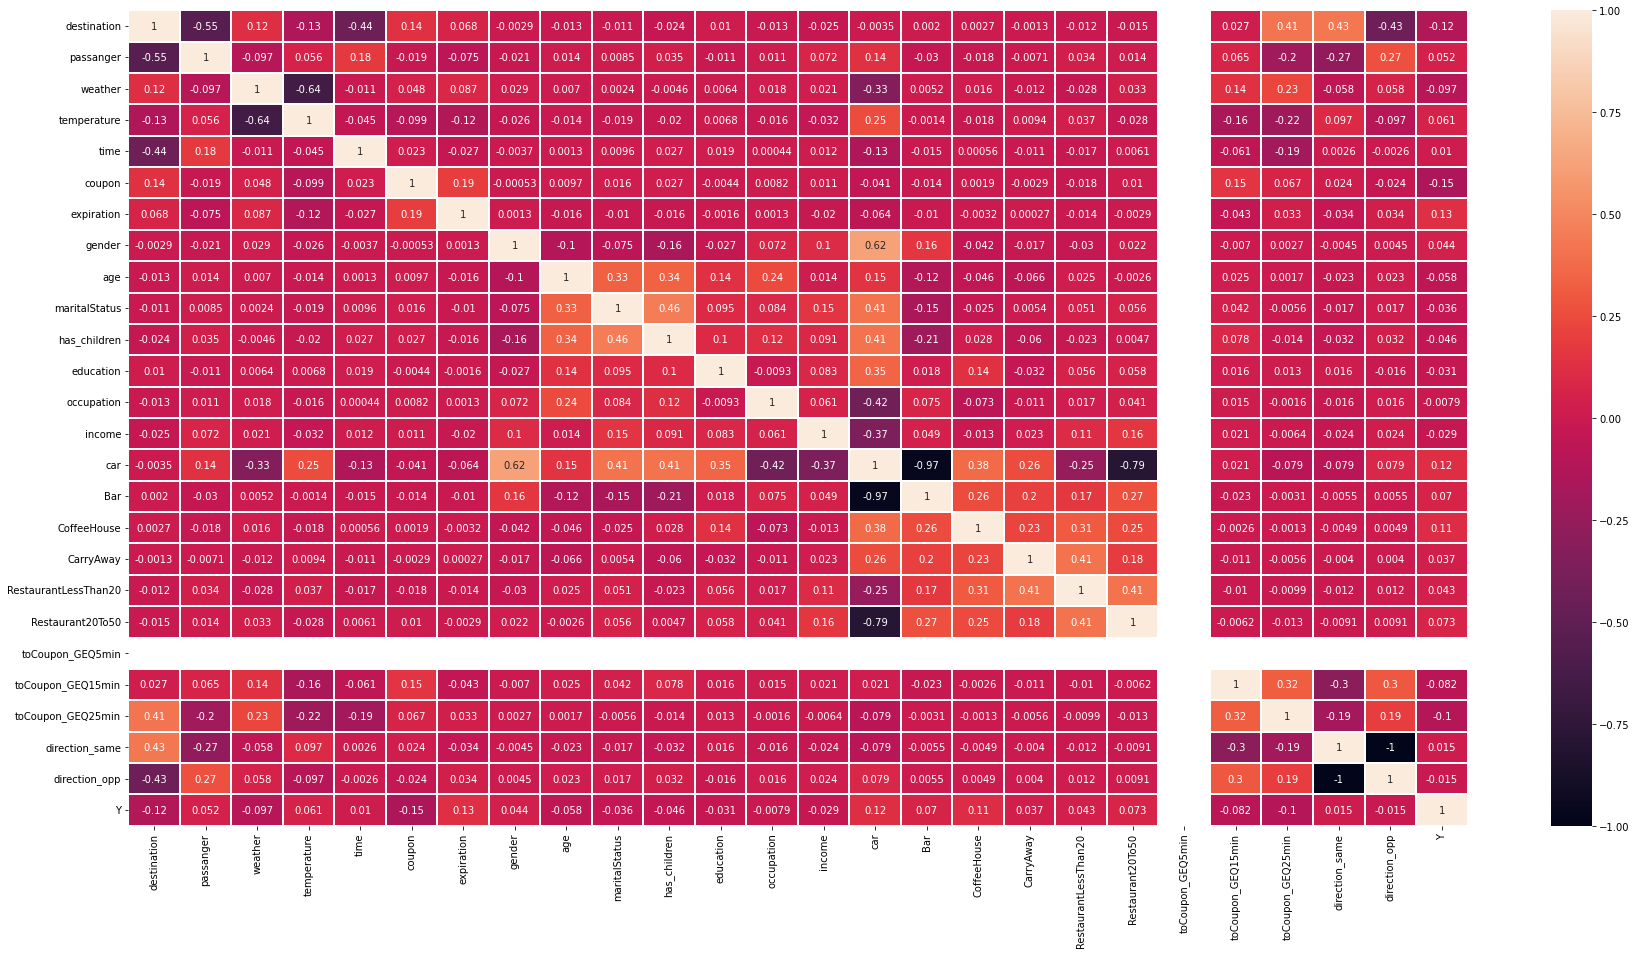

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(data=data.corr(), linewidths=1, fmt='.2g', annot=True);

In [ ]:
data['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [ ]:
data.drop(['toCoupon_GEQ5min'], axis=1, inplace=True) # Delete feature with one value

###Search best parameters for random forest w/o Nan and 'car' 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
data_for_search = data.drop(['car'], axis=1).dropna()

In [ ]:
data_for_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12079 non-null  int64  
 1   passanger             12079 non-null  int64  
 2   weather               12079 non-null  int64  
 3   temperature           12079 non-null  int64  
 4   time                  12079 non-null  int64  
 5   coupon                12079 non-null  int64  
 6   expiration            12079 non-null  int64  
 7   gender                12079 non-null  int64  
 8   age                   12079 non-null  int64  
 9   maritalStatus         12079 non-null  int64  
 10  has_children          12079 non-null  int64  
 11  education             12079 non-null  int64  
 12  occupation            12079 non-null  int64  
 13  income                12079 non-null  float64
 14  Bar                   12079 non-null  float64
 15  CoffeeHouse       

In [ ]:
X = data_for_search.drop(['Y'], axis=1)
y = data_for_search['Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75)

In [ ]:
params = {'n_estimators': range(100, 351, 50), 'max_depth': range(5, 26, 5)}

In [ ]:
clf_search = RandomForestClassifier(random_state=0, warm_start=True)
clf_gscv = GridSearchCV(clf_search, params, n_jobs=-1, verbose=3)

In [ ]:
clf_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0, warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 26, 5),
                         'n_estimators': range(100, 351, 50)},
             verbose=3)

In [ ]:
clf_gscv.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0,
                       warm_start=True)

In [ ]:
clf_gscv.best_params_

{'max_depth': 25, 'n_estimators': 250}

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=200)

In [ ]:
print('Accuracy:', accuracy_score(y_test, clf_gscv.best_estimator_.predict(X_test)))
print('F1:', f1_score(y_test, clf_gscv.best_estimator_.predict(X_test)))
print('ROC AUC:', roc_auc_score(y_test, clf_gscv.best_estimator_.predict(X_test)))

Accuracy: 0.7625827814569537
F1: 0.8004453103256332
ROC AUC: 0.7510828632209867


### Let's make a prediction for the missing data

In [ ]:
data.drop(['car'], axis=1, inplace=True) # No much information in the 'car' variable

In [ ]:
clf_Bar = RandomForestClassifier(n_estimators=clf_gscv.best_params_['n_estimators'], max_depth=clf_gscv.best_params_['max_depth'], warm_start=True) # Use best params from .best_params_
data_train = data.drop(['RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse'], axis=1)
X_train_Bar = data_train[~data['Bar'].isnull()] # Drop not NaN
X_train_Bar = X_train_Bar.drop('Bar', axis=1)
y_Bar = data_train[~data_train['Bar'].isnull()]['Bar']

prediction_Bar = data_train[data['Bar'].isnull()] # Series for replace by prediction
prediction_Bar = prediction_Bar.drop('Bar', axis=1)

In [ ]:
clf_Bar.fit(X_train_Bar, y_Bar)

RandomForestClassifier(max_depth=25, n_estimators=250, warm_start=True)

In [ ]:
data.loc[data[data['Bar'].isnull()]['Bar'].index, 'Bar'] = clf_Bar.predict(prediction_Bar)

In [ ]:
clf_RestaurantLessThan20 = RandomForestClassifier(n_estimators=clf_gscv.best_params_['n_estimators'], max_depth=clf_gscv.best_params_['max_depth'], warm_start=True)
data_train = data.drop(['CarryAway', 'Restaurant20To50', 'CoffeeHouse'], axis=1)
X_train_RestaurantLessThan20 = data_train[~data['RestaurantLessThan20'].isnull()]
X_train_RestaurantLessThan20 = data_train[~data['RestaurantLessThan20'].isnull()]
X_train_RestaurantLessThan20 = X_train_RestaurantLessThan20.drop('RestaurantLessThan20', axis=1)
y_RestaurantLessThan20 = data_train[~data['RestaurantLessThan20'].isnull()]['RestaurantLessThan20']

prediction_RestaurantLessThan20 = data_train[data['RestaurantLessThan20'].isnull()]
prediction_RestaurantLessThan20 = prediction_RestaurantLessThan20.drop('RestaurantLessThan20', axis=1)

In [ ]:
clf_RestaurantLessThan20.fit(X_train_RestaurantLessThan20, y_RestaurantLessThan20)

RandomForestClassifier(max_depth=25, n_estimators=250, warm_start=True)

In [ ]:
data.loc[data[data['RestaurantLessThan20'].isnull()]['RestaurantLessThan20'].index, 'RestaurantLessThan20'] = clf_RestaurantLessThan20.predict(prediction_RestaurantLessThan20)

In [ ]:
clf_CarryAway = RandomForestClassifier(n_estimators=clf_gscv.best_params_['n_estimators'], max_depth=clf_gscv.best_params_['max_depth'], warm_start=True)
data_train = data.drop(['Restaurant20To50', 'CoffeeHouse'], axis=1)
X_train_CarryAway = data_train[~data['CarryAway'].isnull()]
X_train_CarryAway = X_train_CarryAway.drop('CarryAway', axis=1)
y_CarryAway = data_train[~data_train['CarryAway'].isnull()]['CarryAway']

prediction_CarryAway = data_train[data['CarryAway'].isnull()]
prediction_CarryAway = prediction_CarryAway.drop('CarryAway', axis=1)

In [ ]:
clf_CarryAway.fit(X_train_CarryAway, y_CarryAway)

RandomForestClassifier(max_depth=25, n_estimators=250, warm_start=True)

In [ ]:
data.loc[data[data['CarryAway'].isnull()]['CarryAway'].index, 'CarryAway'] = clf_CarryAway.predict(prediction_CarryAway)

In [ ]:
clf_Restaurant20To50 = RandomForestClassifier(n_estimators=clf_gscv.best_params_['n_estimators'], max_depth=clf_gscv.best_params_['max_depth'], warm_start=True)
data_train = data.drop(['CoffeeHouse'], axis=1)
X_train_Restaurant20To50 = data_train[~data['Restaurant20To50'].isnull()]
X_train_Restaurant20To50 = X_train_Restaurant20To50.drop('Restaurant20To50', axis=1)
y_Restaurant20To50 = data_train[~data_train['Restaurant20To50'].isnull()]['Restaurant20To50']

prediction_Restaurant20To50 = data_train[data['Restaurant20To50'].isnull()]
prediction_Restaurant20To50 = prediction_Restaurant20To50.drop('Restaurant20To50', axis=1)

In [ ]:
clf_Restaurant20To50.fit(X_train_Restaurant20To50, y_Restaurant20To50)

RandomForestClassifier(max_depth=25, n_estimators=250, warm_start=True)

In [ ]:
data.loc[data[data['Restaurant20To50'].isnull()]['Restaurant20To50'].index, 'Restaurant20To50'] = clf_Restaurant20To50.predict(prediction_Restaurant20To50)

In [ ]:
clf_CoffeeHouse = RandomForestClassifier(n_estimators=clf_gscv.best_params_['n_estimators'], max_depth=clf_gscv.best_params_['max_depth'], warm_start=True)
X_train_CoffeeHouse = data[~data['CoffeeHouse'].isnull()]
X_train_CoffeeHouse = X_train_CoffeeHouse.drop('CoffeeHouse', axis=1)
y_CoffeeHouse = data[~data['CoffeeHouse'].isnull()]['CoffeeHouse']

prediction_CoffeeHouse = data[data['CoffeeHouse'].isnull()]
prediction_CoffeeHouse = prediction_CoffeeHouse.drop('CoffeeHouse', axis=1)

In [ ]:
clf_CoffeeHouse.fit(X_train_CoffeeHouse, y_CoffeeHouse)

RandomForestClassifier(max_depth=25, n_estimators=250, warm_start=True)

In [ ]:
data.loc[data[data['CoffeeHouse'].isnull()]['CoffeeHouse'].index, 'CoffeeHouse'] = clf_CoffeeHouse.predict(prediction_CoffeeHouse)

In [ ]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

###Train a model with augmented data

In [ ]:
X = data.drop(['Y'], axis=1)
y = data['Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75)

In [ ]:
clf_data = RandomForestClassifier(n_estimators=clf_gscv.best_params_['n_estimators'], max_depth=clf_gscv.best_params_['max_depth'], warm_start=True)

In [ ]:
clf_data.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=250, warm_start=True)

In [ ]:
print('Accuracy:', accuracy_score(y_test, clf_data.predict(X_test)))
print('F1:', f1_score(y_test, clf_data.predict(X_test)))
print('ROC AUC:', roc_auc_score(y_test, clf_data.predict(X_test)))

Accuracy: 0.7593818984547461
F1: 0.7972362476747276
ROC AUC: 0.747730644685298
